Rizki Wahyu Yulianti - A11.2022.14212

In [1]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Mengimpor pustaka pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Model Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# SMOTE untuk menangani imbalance data
from imblearn.over_sampling import SMOTE

# Membaca dataset dari Google Drive
file_path = '/content/drive/MyDrive/ObesityDataSet.csv'
df = pd.read_csv(file_path)

# Tampilkan 5 baris pertama
df.head()

Mounted at /content/drive


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


 Untuk melihat struktur kolom, tipe data (object, int, float), dan apakah ada missing value.

In [2]:
# Melihat info umum dataset: jumlah kolom, tipe data, non-null count
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [3]:
# Mengecek apakah ada nilai kosong (missing values),  Menampilkan jumlah missing value per kolom.
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


Memberikan ringkasan statistik seperti mean, std, min, max, dan frekuensi kategori terbanyak.

In [4]:
# Statistik deskriptif seluruh kolom (numerik dan kategorikal)
df.describe(include='all')


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


 Menampilkan jumlah data untuk setiap label obesitas, apakah datanya seimbang atau tidak.

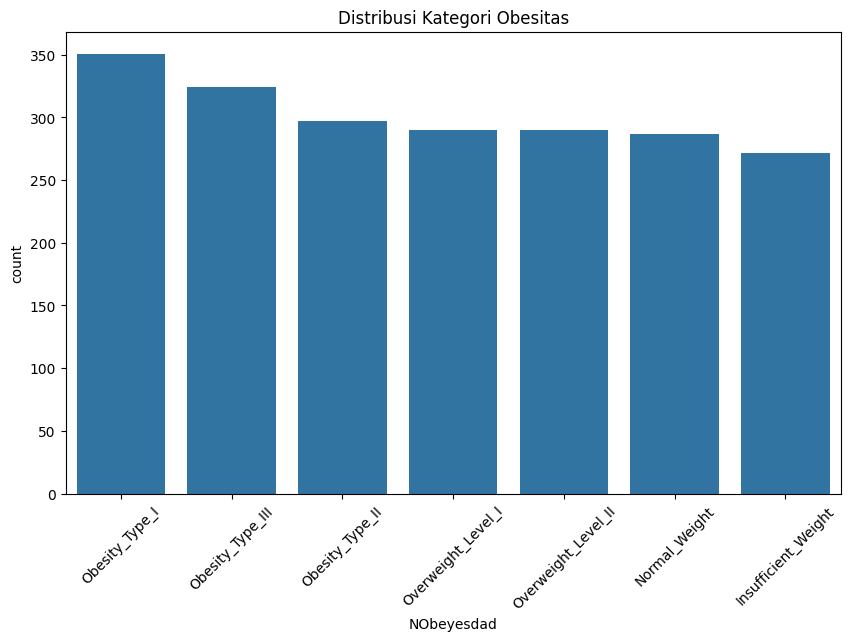

In [5]:
# Visualisasi jumlah data per kategori obesitas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.title('Distribusi Kategori Obesitas')
plt.xticks(rotation=45)
plt.show()


 Scatterplot menunjukkan hubungan antara tinggi dan berat serta distribusinya terhadap kelas obesitas.

In [6]:
# Melihat jumlah nilai unik di setiap kolom
df.nunique()

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [7]:
# Mengecek jumlah data yang duplikat
print("\nDuplikasi:", df.duplicated().sum())



Duplikasi: 18


Boxplot menunjukkan data ekstrem (outlier), ditandai dengan titik di luar garis whisker.

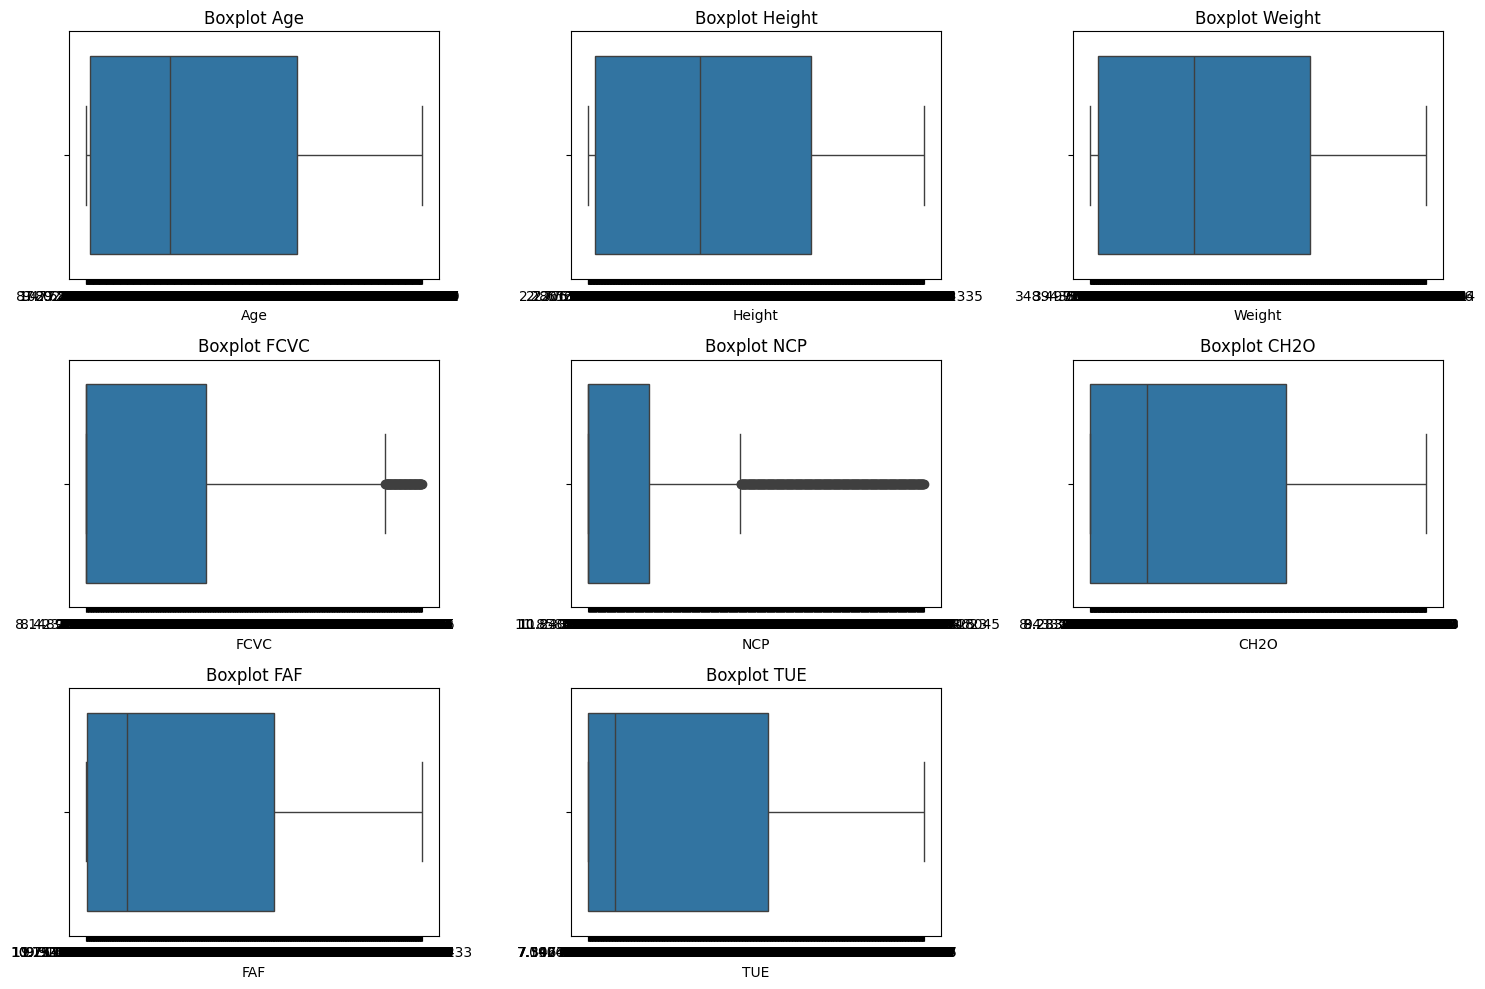

In [8]:
# Menampilkan boxplot untuk kolom numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


Melihat distribusi kategori obesitas seimbang. Kalau tidak seimbang, nanti diatasi dengan SMOTE atau undersampling.


In [9]:
# Melihat distribusi kelas target dalam persen
df['NObeyesdad'].value_counts(normalize=True) * 100


,proportion
NObeyesdad,
Obesity_Type_I,16.627191
Obesity_Type_III,15.348176
Obesity_Type_II,14.069162
Overweight_Level_I,13.737565
Overweight_Level_II,13.737565
Normal_Weight,13.595452
Insufficient_Weight,12.884889


In [10]:
# Menghapus missing values dan duplikasi
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Pastikan data numerik valid dan bertipe float
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Hapus baris dengan nilai NaN pada kolom numerik
df.dropna(subset=numeric_cols, inplace=True)

# Hapus data tidak valid (misal tinggi dan berat harus > 0)
df = df[(df['Height'] > 0) & (df['Weight'] > 0)]

# Deteksi dan hapus outlier dengan metode IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


Kesimpulan EDA:
- Dataset tidak memiliki banyak missing value dan duplikasi. Terdapat outlier pada beberapa fitur numerik. Distribusi target NObeyesdad tidak seimbang.

In [11]:
# Encode fitur kategori menjadi numerik menggunakan pd.get_dummies (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Encode target variable dengan LabelEncoder
le = LabelEncoder()
df['NObeyesdad_enc'] = le.fit_transform(df['NObeyesdad'])

# Pisahkan fitur dan target
X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'NObeyesdad_' in col], errors='ignore')
y = df['NObeyesdad_enc']

In [12]:
# Mengatasi ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("\nDistribusi kelas target setelah SMOTE:")
print(pd.Series(y_res).value_counts(normalize=True) * 100)


Distribusi kelas target setelah SMOTE:
NObeyesdad_enc
1    14.285714
5    14.285714
2    14.285714
6    14.285714
3    14.285714
0    14.285714
4    14.285714
Name: proportion, dtype: float64


menstandarkan kolom numerik agar data lebih seragam dan model bisa belajar dengan lebih optimal.

In [13]:
# Normalisasi data numerik dengan StandardScaler
scaler = StandardScaler()
X_res[numeric_cols] = scaler.fit_transform(X_res[numeric_cols])

Kesimpulan Preprocessing:
- Data sudah bersih dari missing value dan outlier. Kelas target seimbang setelah SMOTE. Data numerik dinormalisasi dan fitur kategorikal berhasil diubah menjadi numerik.

In [14]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


Evaluasi Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.82      0.98      0.89        60
           2       0.98      0.96      0.97        57
           3       1.00      0.98      0.99        54
           4       1.00      1.00      1.00        39
           5       0.98      0.85      0.91        55
           6       0.98      0.97      0.98        62

    accuracy                           0.96       385
   macro avg       0.97      0.96      0.96       385
weighted avg       0.96      0.96      0.96       385



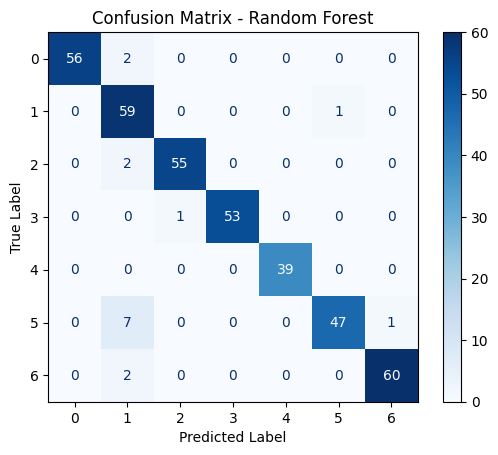


Evaluasi Model: KNN
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        58
           1       0.87      0.55      0.67        60
           2       0.82      0.93      0.87        57
           3       0.95      0.98      0.96        54
           4       0.95      1.00      0.97        39
           5       0.76      0.82      0.79        55
           6       0.90      0.85      0.88        62

    accuracy                           0.87       385
   macro avg       0.87      0.88      0.87       385
weighted avg       0.87      0.87      0.86       385



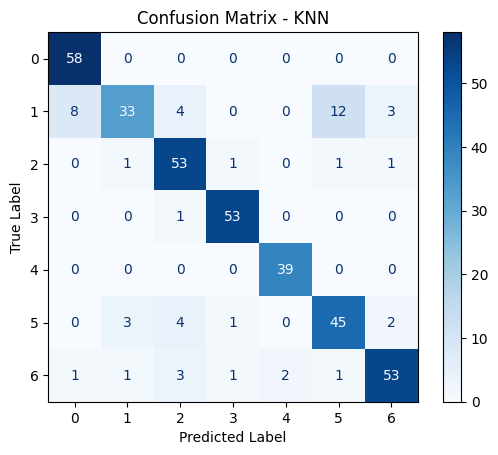


Evaluasi Model: Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.88      0.87      0.87        60
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        39
           5       0.91      0.93      0.92        55
           6       0.97      0.95      0.96        62

    accuracy                           0.95       385
   macro avg       0.96      0.96      0.96       385
weighted avg       0.95      0.95      0.95       385



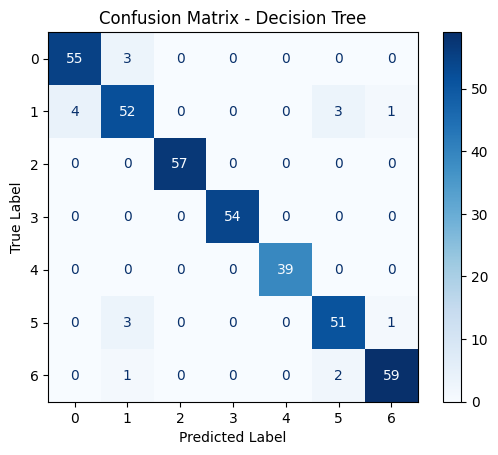

In [15]:
# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

results = {}

for name, model in models.items():
    print(f"\nEvaluasi Model: {name}")

    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)

    # Menampilkan classification report
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Hitung metrik evaluasi
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Semua metrik ke dalam dictionary
    results[name] = {
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "Training Time (s)": round(end - start, 4)
    }



Ringkasan Performa Model:
               Accuracy  Precision  Recall  F1 Score  Training Time (s)
Random Forest    0.9584     0.9636  0.9584    0.9592             0.4246
Decision Tree    0.9532     0.9533  0.9532    0.9532             0.0174
KNN              0.8675     0.8692  0.8675    0.8612             0.0042


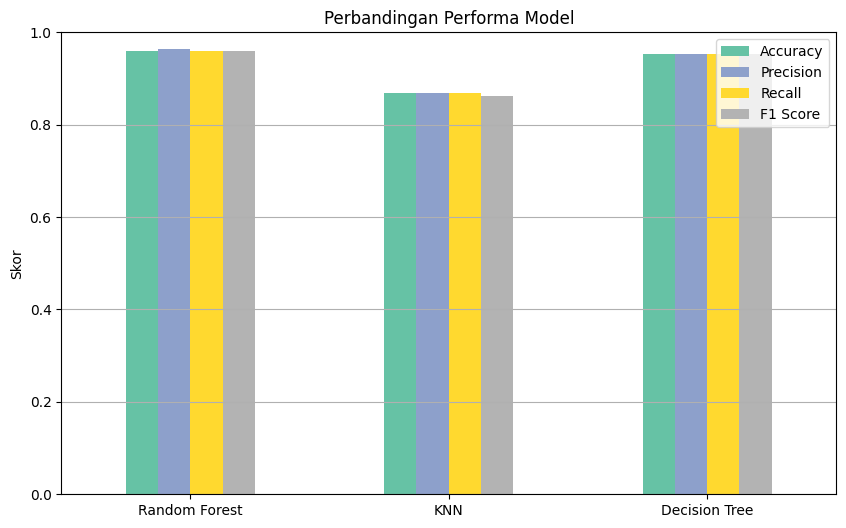

In [16]:
# Membuat DataFrame hasil evaluasi
results_df = pd.DataFrame(results).T
print("\nRingkasan Performa Model:")
print(results_df.sort_values(by='Accuracy', ascending=False))

# Visualisasi perbandingan metrik
results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', figsize=(10,6), colormap='Set2'
)
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [17]:
# Menampilkan hasil akhir dari semua model dalam bentuk tabel
result_df = pd.DataFrame(results).T
print("\n Hasil Perbandingan Model:")
print(result_df.sort_values(by="Accuracy", ascending=False))


 Hasil Perbandingan Model:
               Accuracy  Precision  Recall  F1 Score  Training Time (s)
Random Forest    0.9584     0.9636  0.9584    0.9592             0.4246
Decision Tree    0.9532     0.9533  0.9532    0.9532             0.0174
KNN              0.8675     0.8692  0.8675    0.8612             0.0042


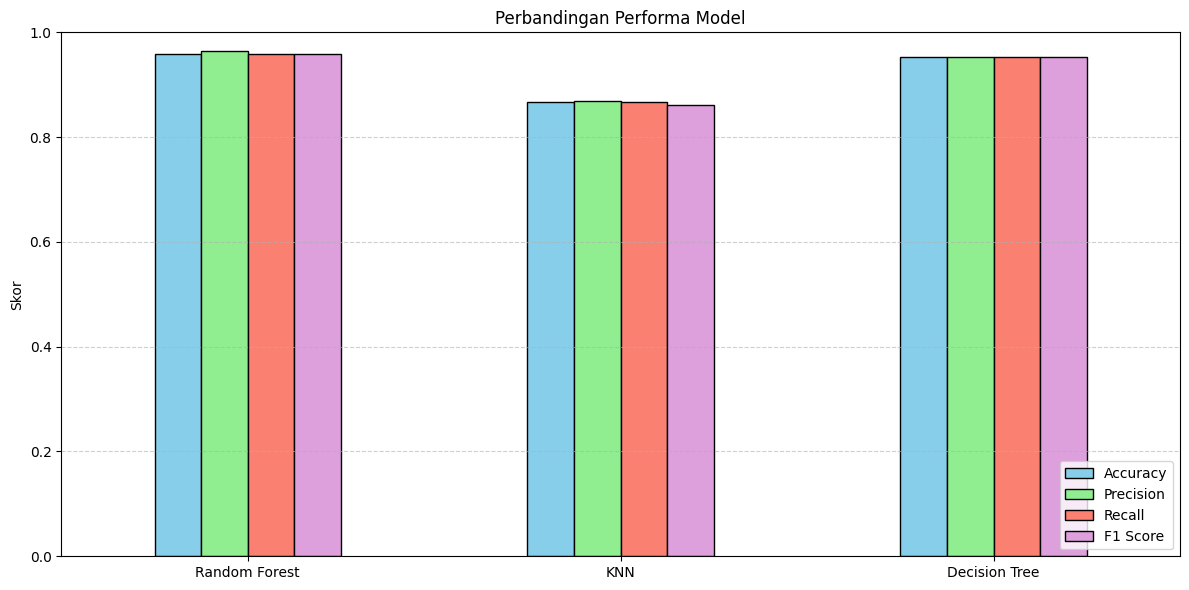

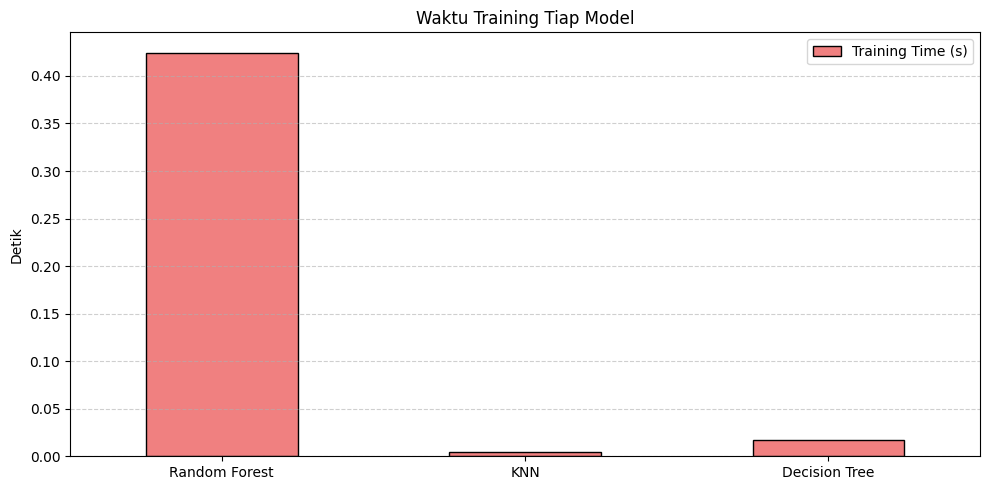

In [18]:
# Membuat DataFrame dari hasil evaluasi
result_df = pd.DataFrame(results).T

# Bar plot akurasi
result_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar',
    color=['skyblue', 'lightgreen', 'salmon', 'plum'],
    edgecolor='black',
    figsize=(12, 6)
)
plt.title("Perbandingan Performa Model")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Visualisasi waktu training
result_df[['Training Time (s)']].plot(kind='bar',color='lightcoral',edgecolor='black',figsize=(10, 5))
plt.title("Waktu Training Tiap Model")
plt.ylabel("Detik")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Model Random Forest menunjukkan performa terbaik secara keseluruhan dengan akurasi, presisi, recall, dan F1-score tertinggi, meskipun membutuhkan waktu training lebih lama dibandingkan KNN dan Decision Tree yang lebih cepat namun kurang akurat.

In [19]:
# Hyperparameter Tuning Random Forest
param_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print("Best Parameters (Random Forest):", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_



Best Parameters (Random Forest): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:
# Hyperparameter Tuning KNN
param_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
print("Best Parameters (KNN):", grid_knn.best_params_)
best_knn = grid_knn.best_estimator_


Best Parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Hyperparameter Tuning Decision Tree
param_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
print("Best Parameters (Decision Tree):", grid_dt.best_params_)
best_dt = grid_dt.best_estimator_


Best Parameters (Decision Tree): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Hyperparameter tuning digunakan untuk mencari kombinasi pengaturan terbaik dari model agar menghasilkan performa klasifikasi yang paling optimal.

In [ ]:
# Evaluasi model setelah tuning
tuned_models = {
    'Random Forest (Tuned)': best_rf,
    'KNN (Tuned)': best_knn,
    'Decision Tree (Tuned)': best_dt
}

# Evaluasi ulang
final_results = {}

for name, model in tuned_models.items():
    print(f"\nEvaluasi Model: {name}")
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    tuned_results[name] = {
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "Training Time (s)": round(end - start, 4)
    }

# Menampilkan hasil
tuned_df = pd.DataFrame(tuned_results).T
print("\nHasil Evaluasi Setelah Hyperparameter Tuning:")
print(tuned_df.sort_values(by="Accuracy", ascending=False))



Evaluasi Model: Random Forest (Tuned)

Evaluasi Model: KNN (Tuned)

Evaluasi Model: Decision Tree (Tuned)

Hasil Evaluasi Setelah Hyperparameter Tuning:
                       Accuracy  Precision  Recall  F1 Score  \
Random Forest (Tuned)    0.9610     0.9662  0.9610    0.9618   
Decision Tree (Tuned)    0.9532     0.9533  0.9532    0.9532   
KNN (Tuned)              0.9221     0.9212  0.9221    0.9203   

                       Training Time (s)  
Random Forest (Tuned)             0.3468  
Decision Tree (Tuned)             0.0161  
KNN (Tuned)                       0.0039  


Kesimpulan Modeling & Evaluasi:
- Ketiga model (Random Forest, KNN, dan Decision Tree) berhasil dilatih dan diuji dengan baik. Dari hasil evaluasi, Random Forest menunjukkan performa terbaik dengan akurasi, precision, recall, dan F1 score tertinggi serta waktu pelatihan yang masih efisien. KNN dan Decision Tree juga memberikan hasil yang baik namun dengan performa sedikit di bawah Random Forest. Dengan demikian, Random Forest menjadi pilihan model yang paling optimal untuk dataset ini

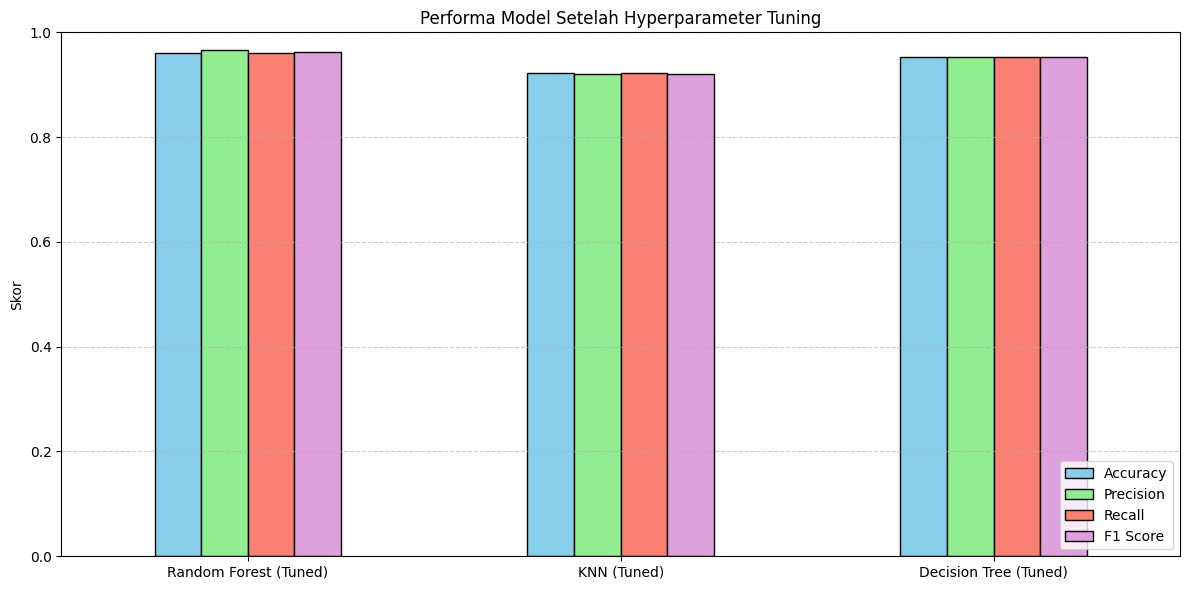

In [ ]:
# Visualisasi hasil tuning
tuned_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'plum'], edgecolor='black', figsize=(12, 6))
plt.title("Performa Model Setelah Hyperparameter Tuning")
plt.ylabel("Skor")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Kesimpulan:
Dari hasil evaluasi dan visualisasi performa model, ketiga model (Random Forest, KNN, dan Decision Tree) menunjukkan skor akurasi, presisi, recall, dan F1 score yang cukup tinggi setelah hyperparameter tuning; namun, Random Forest (Tuned) menempati posisi terbaik dengan akurasi tertinggi sekaligus waktu pelatihan yang masih efisien, sehingga menjadi model paling optimal untuk klasifikasi pada dataset ini.